# Alternate Mark Inversion (AMI) Encoding and Decoding Python Impelementation

In this practical, at first we saw the graph of input set, then observe both encoded and decoded graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install numpy

In [3]:
# !pip install matplotlib

- numpy is useful for handling data structures and mathematical functions.

- matplotlib.pyplot is used for creating visual plots and graphs to represent data.

- for installing numpy and matplotlib, we can just run the commented 2 line code without commenting

In [4]:
input_binary_string = '10110010'
#  input_binary_string = input("Enter a binary string (e.g., 10110010): ")

Here I just took the input.

In [5]:
input_binary_array_list = [int(char) for char in input_binary_string]
print(input_binary_array_list)

[1, 0, 1, 1, 0, 0, 1, 0]


At first, I compress the string to a list of integers and then normally print the output list.

In [6]:
def graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(8,4))
    plt.step(time, signal,where='post',color='red')
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.title('Input GRAPH')
    # plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

This code mainly generate the graph, now I will just call the function referencing the input signal.

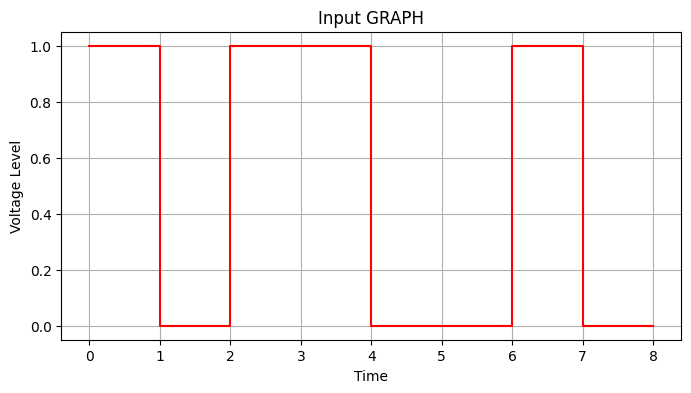

In [7]:
graph_design(input_binary_array_list)

And this complete the graph of input set.

# Introduction to AMI Encoding and Decoding Scheme

AMI (Alternate Mark Inversion) is a synchronous clock encoding technique that uses bipolar pulses to represent a
logical 1. The next logic 1 is represented by a pulse of the opposite polarity. Hence, a sequence of logical 1s is
represented by a sequence of pulses of alternating polarity. That means----
• Binary 0 → 0V
• Binary 1 → Alternates between +V and -V
• Used to maintain synchronization and eliminate DC bias.

### Algorithm for AMI Encoding:
1. Initialize last = -1 (this tracks polarity of last '1')
2. For each bit in the binary string:

    - If bit is '0', append 0 (neutral)

    - If bit is '1':

        - Flip last to its opposite sign
        
        - Append last

In [8]:
def AMI_encoder(bits,intial_state):
    ami_signal = []
    for bit in bits:
        if bit == '1':
            intial_state*= -1
            ami_signal.append(intial_state)
        else:
            ami_signal.append(0)
    return ami_signal


In [9]:
ami_encoded_signal_negative = AMI_encoder(input_binary_string,-1)

In [10]:
print(f"AMI Encoded Signal Initial Negative : {ami_encoded_signal_negative}")

AMI Encoded Signal Initial Negative : [1, 0, -1, 1, 0, 0, -1, 0]


In [11]:
def AMI_encoded_graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(8,4))
    plt.step(time, signal,where='post',color='purple')
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.title(f"AMI Encoding for intial negative: {input_binary_string}")
    plt.yticks([-1, 0, 1])
    plt.grid(True)
    plt.show()   

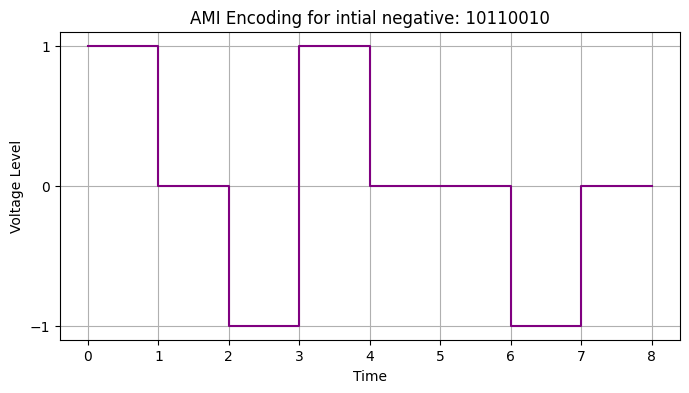

In [12]:
AMI_encoded_graph_design(ami_encoded_signal_negative)

### Algorithm for AMI Decoding:
1. For each voltage in the list:

- If value is 0, append '0'
- If value is +V or -V, append '1'

In [13]:
def AMI_decode(ami_encoded_signal):
    decoded_signal =''
    for i in range(0,len(ami_encoded_signal)):
        if ami_encoded_signal[i] == 0:
            decoded_signal +='0'
        else:
            decoded_signal +='1'
        

    return decoded_signal

In [14]:
ami_decoded_signal_negative = AMI_decode(ami_encoded_signal_negative)

In [15]:
print(f"Ami Decoded Signal Negative : {ami_decoded_signal_negative}")

Ami Decoded Signal Negative : 10110010


In [16]:
decode_list_negative = [int(char) for char in ami_decoded_signal_negative]
print(decode_list_negative)

[1, 0, 1, 1, 0, 0, 1, 0]


In [17]:
def AMI_encoded_graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(8,4))
    plt.step(time, signal,where='post',color='purple')
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.title(f"AMI Decoding for intial negative: {input_binary_string}")
    plt.yticks([0, 1])
    plt.grid(True)
    plt.show()     

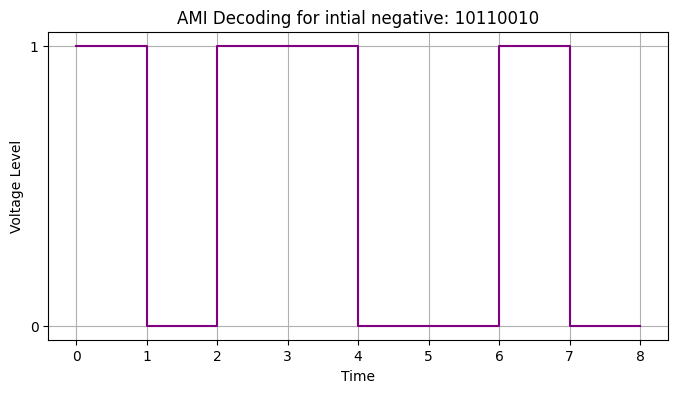

In [18]:
AMI_encoded_graph_design(decode_list_negative)